In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression                                    
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

import warnings   
warnings.filterwarnings("ignore")

In [3]:
#To see all the datasets present in seaborn library
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
#Load the dataset from seaborn
df=sns.load_dataset('mpg')

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [7]:
df.shape

(398, 9)

In [8]:
print(f"There are{df.shape[0]} rows and {df.shape[1]} columns in the data")

There are398 rows and 9 columns in the data


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [11]:
df.origin.value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [12]:
df.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

### <b> <u>  Data science</b></u>

In [13]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
#we will fill the null values in horsepower column
df['horsepower'].fillna(df['horsepower'].median(),inplace=True)

In [16]:
df.horsepower.isnull().sum()

np.int64(0)

In [17]:
df.describe().T #statistical summary

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


#### <b><u> Inference:</u></b>
- The average mpg is 23.51,and the least mpg is 9,and max is 46.6
- The minimum number of cylinders is 3,and maximum is 8
- The minimum acceleration of the cars is 8.0 and maximum is 24.8

In [18]:
numerical=df.select_dtypes(include=['int','float']).columns
categorical=df.select_dtypes(include=['object']).columns
print(numerical)
print(categorical)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')
Index(['origin', 'name'], dtype='object')


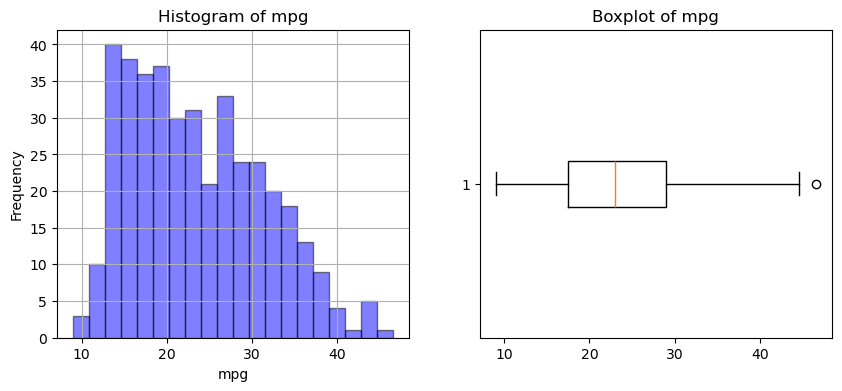

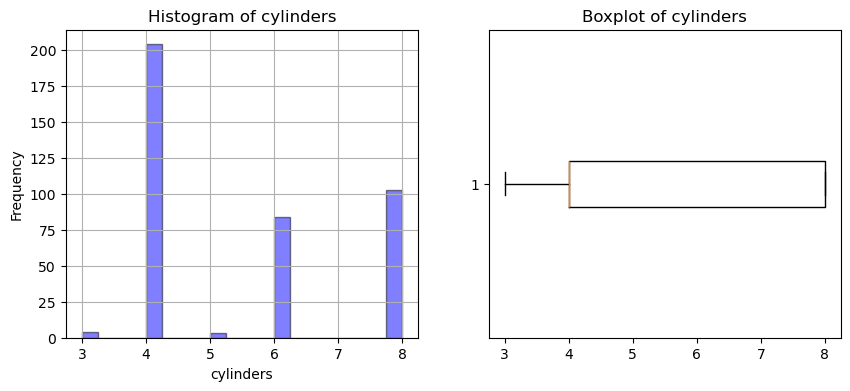

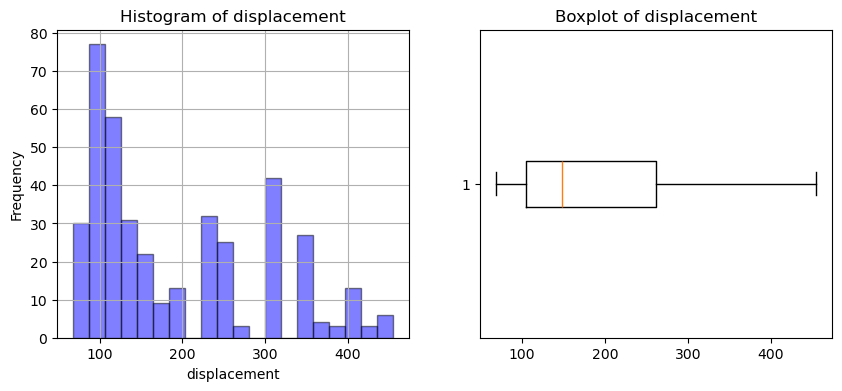

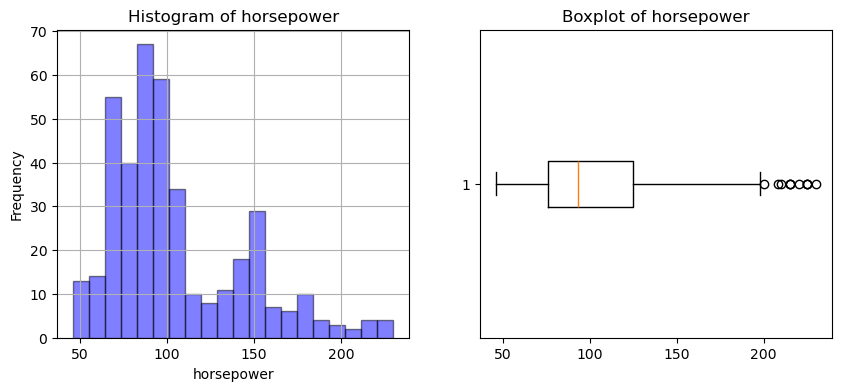

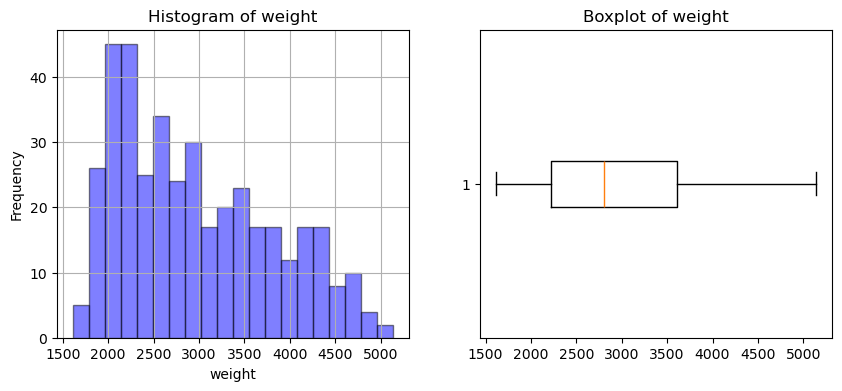

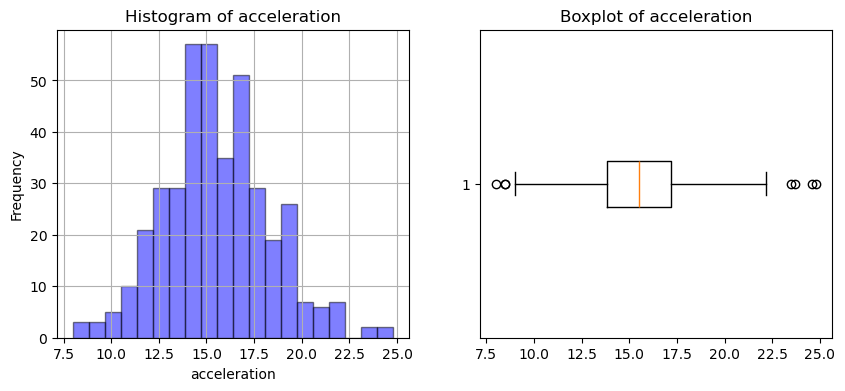

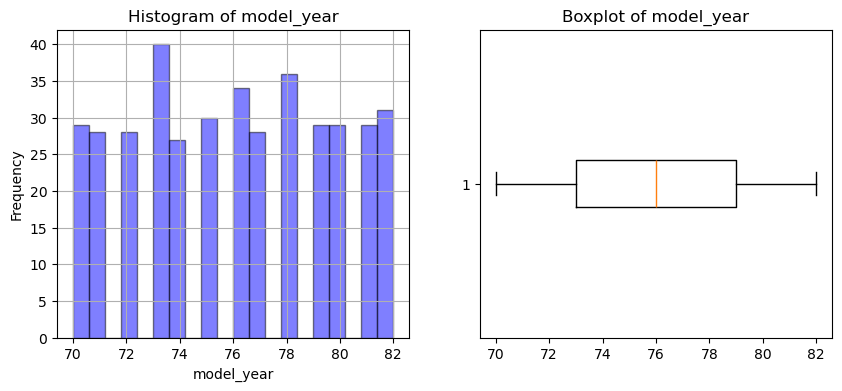

In [19]:
for i  in numerical:
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    df[i].hist(bins=20,alpha=0.5,color='b',edgecolor='black')
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')

    plt.subplot(1,2,2)
    plt.boxplot(df[i],vert=False)
    plt.title(f'Boxplot of {i}')
    plt.show()
    
    

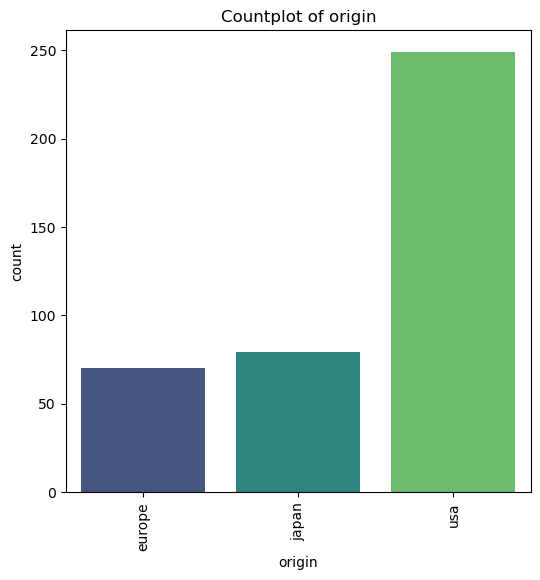

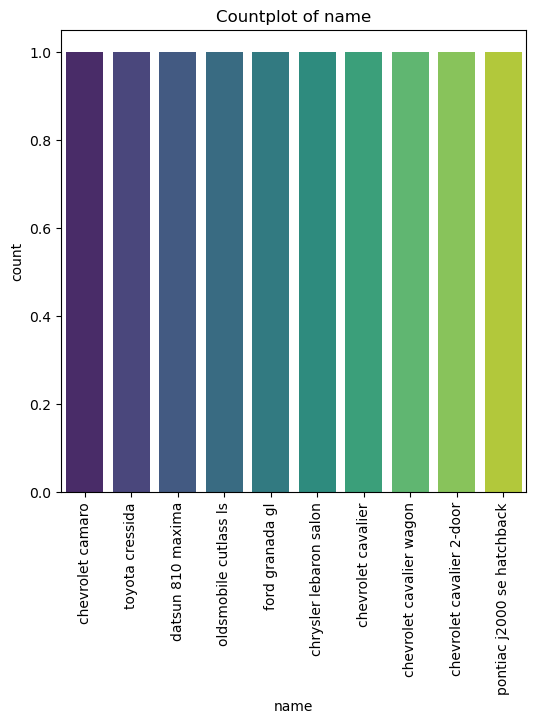

In [20]:
import seaborn as sns
for col in categorical:
    plt.figure(figsize=(6,6))
    sns.countplot(x=col,data=df,order=df[col].value_counts().sort_values().head(10).index,palette='viridis')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=90)
    plt.show()

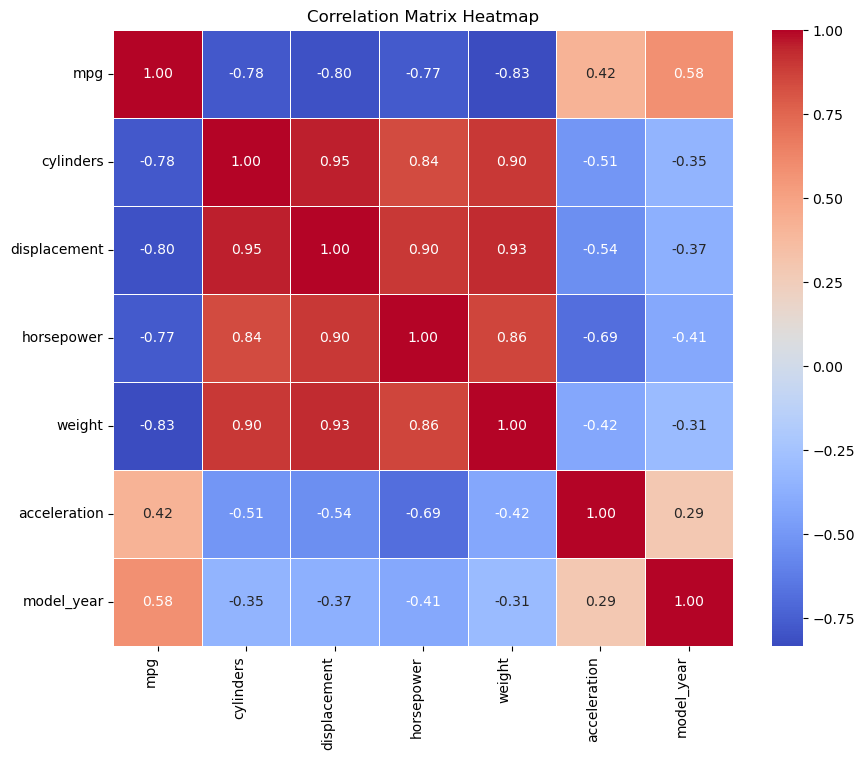

In [22]:
corr_data=df[numerical].corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr_data,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.xticks(rotation=90,ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [23]:
#select the relevant features for my input values(x)
x=df[['cylinders','displacement','horsepower','weight']]
#you can select other features here
y=df['mpg'] #target variable

In [24]:
#split the data into training and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
#create polynomial features
degree=3 #change the degree of the polynomial
poly=PolynomialFeatures(degree)
x_poly_train=poly.fit_transform(x_train)

In [26]:
#fit a polynomial regresiion model
model=LinearRegression()
model.fit(x_poly_train,y_train)

LinearRegression()

In [27]:
#make predictions of y
#polynomially transform the x_test values for prediction
x_poly_test=poly.transform(x_test)
y_pred=model.predict(x_poly_test)

In [30]:
#evaluate the model on the test set
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

#print the evaluation metrics
print(f'Mean Squared Error (MSE):{mse:.2f}')
print(f'Root Mean Squared Error (RMSE):{rmse:.2f}')
print(f'R-squared (R²) or Accuracy:{r2*100:.2f}%')

Mean Squared Error (MSE):11.78
Root Mean Squared Error (RMSE):3.43
R-squared (R²) or Accuracy:78.08%


In [33]:
df.tail(15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
383,38.0,4,91.0,67.0,1965,15.0,82,japan,honda civic
384,32.0,4,91.0,67.0,1965,15.7,82,japan,honda civic (auto)
385,38.0,4,91.0,67.0,1995,16.2,82,japan,datsun 310 gx
386,25.0,6,181.0,110.0,2945,16.4,82,usa,buick century limited
387,38.0,6,262.0,85.0,3015,17.0,82,usa,oldsmobile cutlass ciera (diesel)
388,26.0,4,156.0,92.0,2585,14.5,82,usa,chrysler lebaron medallion
389,22.0,6,232.0,112.0,2835,14.7,82,usa,ford granada l
390,32.0,4,144.0,96.0,2665,13.9,82,japan,toyota celica gt
391,36.0,4,135.0,84.0,2370,13.0,82,usa,dodge charger 2.2
392,27.0,4,151.0,90.0,2950,17.3,82,usa,chevrolet camaro


In [32]:
x_poly_test2=poly.transform([[4,120.0,79.0,2625]])
y_pred2=model.predict(x_poly_test2)
print(f"original y value for this,is 28.0,predicted value is{y_pred2}")

original y value for this,is 28.0,predicted value is[28.16195135]
